### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
sys.path.append(os.getcwd())

import constants

### Testing the MATH Dataset

In [2]:
from data_classes.MathDataLoader import MathDataLoader
from data_classes.MathProblem import MathProblem
from llm_agents.ChainOfThoughtMathSolver import ChainOfThoughtMathSolver

math_data_loader = MathDataLoader(data_dir=constants.MATH_DATASET_DIR)
# random_problem = math_data_loader.get_random_problem(level=5)
# random_problem = math_data_loader.get_problem(type="algebra", problem_number=265)
# random_problem = math_data_loader.get_problem(type="number_theory", problem_number=439)
random_problem = math_data_loader.get_problem(type="precalculus", problem_number=1098)

print(random_problem)
print(random_problem.problem_statement)

math_solver = ChainOfThoughtMathSolver()
response = math_solver(random_problem.problem_statement)

print(response)

random_problem.is_correct_answer(response, verbose=True)

Loaded 5000 math problems from 7 problem types
MATH problem number 1098 of type Precalculus with level 5 and answer \boxed{11}.
The matrix
\[\mathbf{A} = \begin{pmatrix} 4 & 7 \\ c & d \end{pmatrix}\]has the property that if you are told the value of $\|\mathbf{v}\|,$ then you can derive the value of $\|\mathbf{A} \mathbf{v}\|.$  Compute $|c - d|,$ assuming that $c$ and $d$ are real numbers.
In ChainOfThoughtMathSolver
To solve the problem, we need to ensure that the matrix \(\mathbf{A}\) must be such that the norm (length) of the vector \(\mathbf{A} \mathbf{v}\) is a scaled version of the norm of the vector \(\mathbf{v}\). This property essentially means that \(\mathbf{A}\) must be similar to a matrix which is proportional to an orthogonal matrix.

One property to check is that \(\mathbf{A}\) is proportional to an orthogonal matrix, i.e., \(\mathbf{A} = k\mathbf{Q}\) for some constant \(k\) and orthogonal matrix \(\mathbf{Q}\). An orthogonal matrix \(\mathbf{Q}\) has \(\mathbf{Q}^T \m

(False, '\\boxed{|c - d|}', '\\boxed{11}')

In [3]:
# results = math_data_loader.test_random_problems(math_solver, n_problems=10, level=1, verbose=True)

### Running MACM

In [4]:
import utils
if not os.getenv("OPENAI_API_KEY") or  not os.getenv("TAVILY_API_KEY"):
    os.environ["OPENAI_API_KEY"] = utils.get_openai_api_key()
    os.environ["TAVILY_API_KEY"] = utils.get_tavily_api_key()

In [5]:
run_raw_macm = False

if run_raw_macm:
    sys.path.append(os.path.abspath("MACM/"))

    from MACM.main import main as main_macm

    n = 1 # verification times
    times = 5 # The upper limit of the mining times
    min_voters = 1 # min number of voters
    max_voters = 3 # max number of voters
    problem_statement = random_problem.problem_statement

    main_macm(problem_statement, times, n, min_voters, max_voters, verbose=True)  # Assuming these are defined elsewhere

### LangChain MACM

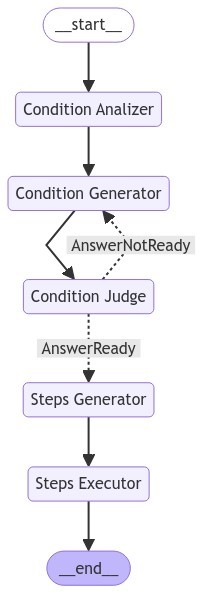

In [6]:
from multi_agent_graph import get_multi_agent_summarizer_graph
from IPython.display import Image, display

graph = get_multi_agent_summarizer_graph()
app = graph.compile()
display(Image(app.get_graph(xray=True).draw_mermaid_png())) 

def macm(math_problem):
    graph = get_multi_agent_summarizer_graph()
    app = graph.compile()
    
    config = {"recursion_limit": 50}
    inputs = {
        "math_problem": math_problem,
        "max_iterations": 1,
        "verified_conditions": [],
        "unverified_conditions": [],
        "objectives": [],
        "steps": [],
        "final_answer": None
    }

    for event in app.stream(inputs, config=config):
        pass
        # print_dict(event)
    
    last_event_name = list(event.keys())[0]
    return event[last_event_name]['final_answer']

#### Single Problem

In [ ]:
response = macm(random_problem)
print(response)
random_problem.is_correct_answer(response, verbose=True)

#### Multiple Problems in Parallel

In [7]:
math_problems = math_data_loader.get_random_problems(n_problems=2)
print(f'Math Problems to Evaluate: {[p.get_id() for p in math_problems]}')
results = math_data_loader.test_math_parallel(macm, math_problems)
print(results)
math_data_loader.save_results(results, constants.MATH_EVAL_DIR)

['Algebra_2482', 'Algebra_2577']
In AgentConditionAnalyzer
In AgentConditionAnalyzer
3 Conditions: 
['The given function is q(x) = \\frac{\\sqrt{x}}{\\sqrt{1-x^2}}', 'The function q(x) requires the square root of x in the numerator.', 'The function q(x) requires the square root of 1-x^2 in the denominator.']
1 Objectives: 
['Determine the domain of the real-valued function q(x), expressed as an interval or as a union of intervals.']
In AgentConditionGenerator
2 Conditions: 
['The given quadratic equation is \\(\\frac{1}{2}x^2 + 99x + c = 0\\).', 'The roots of this quadratic equation are \\(x = -99 + \\sqrt{8001}\\) and \\(x = -99 - \\sqrt{8001}\\).']
1 Objectives: 
['Find the value of \\(c\\) in the given quadratic equation.']
In AgentConditionGenerator
